In [1]:
library(tidyverse)
library(repr)
options(repr.matrix.max.rows = 7)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


This is an analysis of the "players" dataset from the PLAIcraft project.

In [2]:
players <- read_csv("Data/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


It can be seen from the table that there are 196 observations (responses) in total. In the data, each user's name and email are recorded. Additionally, the responder's gender and experience ranking are given as factors. Whether they are subscribed to a gaming newsletter is isted as a logical factor. Finally, the amount of hours played and age are both listed as numerical factors. 
Ultimately, this gives five variables that can be reasonably measured: 
- Experience
- Whether they are subscribed
- Hours played
- Gender
- Age

Firstly, the mean of the numerical data is taken, and the characteristic data compared in a bar graph.

played_hours,Age
<dbl>,<dbl>
5.845918,20.52062


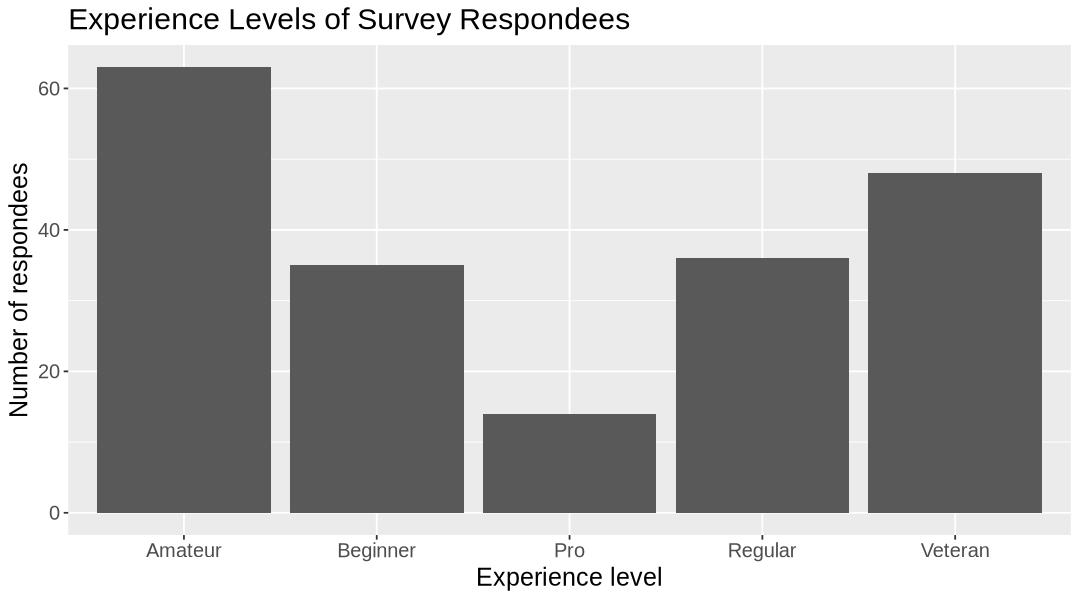

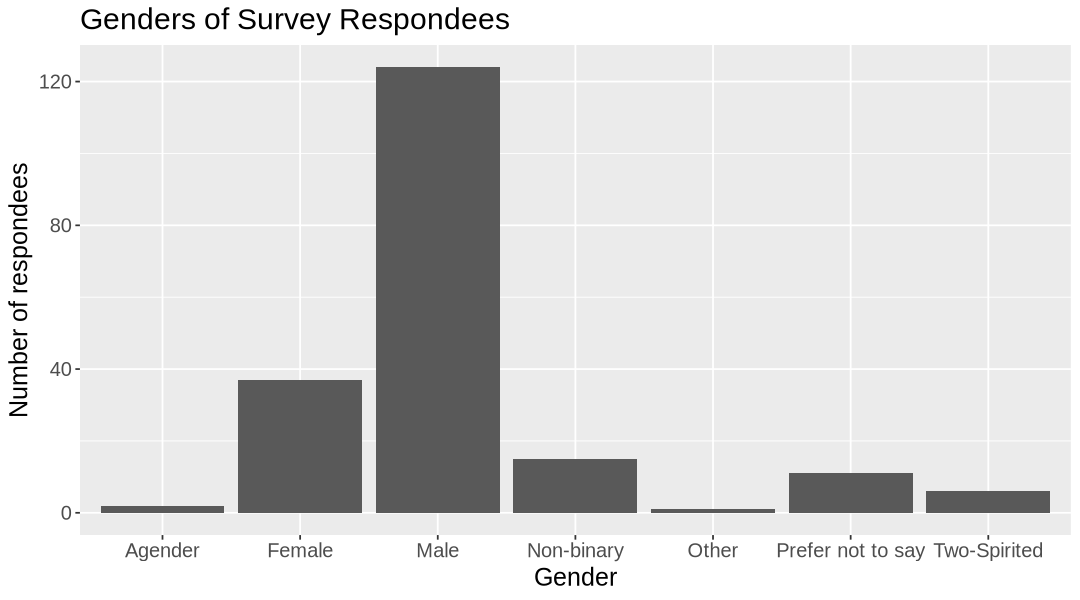

In [8]:
numbers <- players |>
select(played_hours, Age) |>
map_df(mean, na.rm = TRUE) 
numbers

options(repr.plot.width = 9, repr.plot.height = 5) 

exp <- ggplot(players, aes(x= experience)) + 
geom_bar() + 
labs(x="Experience level", y="Number of respondees") +
ggtitle("Experience Levels of Survey Respondees") + 
theme(text = element_text(size = 15))
exp

genders <- ggplot(players, aes(x= gender)) + 
geom_bar() + 
labs(x="Gender", y="Number of respondees") +
ggtitle("Genders of Survey Respondees") +
theme(text = element_text(size = 15))
genders

From these results, it can be seen that the mean amount of hours played is 5.85 hours, and the mean age of a player is roughly 20-21. It can also be seen that there are higher numbers of amateur and vetaran players, and lower numbers of pro players. 
Interestingly, the gender of players is heavily slanted towards male players, making up over half of respondees. 

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_count()`).”


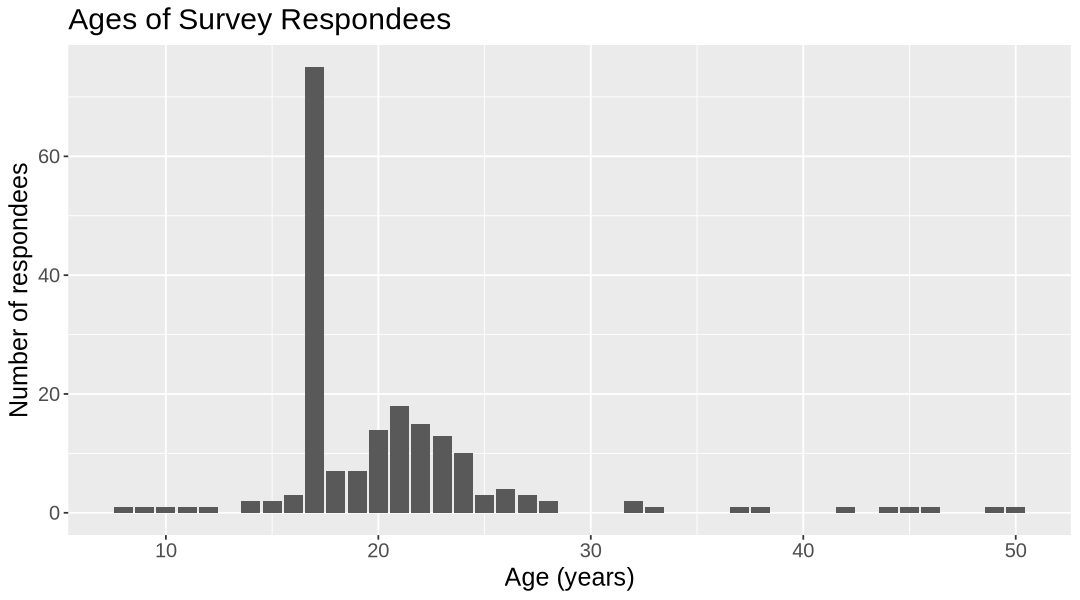

In [9]:
ages <- ggplot(players, aes(x= Age)) + 
geom_bar() + 
labs(x="Age (years)", y="Number of respondees") +
ggtitle("Ages of Survey Respondees") +
theme(text = element_text(size = 15))
ages

The above histogram showing the distribution of ages of survey respondees shows a disproportionate number of 17-year-olds. Besides the outlier, it appears that most respondees are from the ages of 16-28, whilst the whole range of ages goes from 8-50. 

The broad question to answer is what player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how these features differ between various player types. 

The specific research question is to see if age groups (comparing children (<18) and adults (≥18) can be used to predict a user's willingness to purchase a gaming newsletter subscription. This question was chosen as it is likely that the income for adults or the lack of other financial costs for children may both affect the decision of adults and children to purchase a gaming newsletter subscription. 

The variables relevant to the question of interest are the subscription status and age of the users. However, it may be worthwhile to investigate experiences and played hours, as those may have relevant trends within age groups that may also correlate to whether the users are subscribed. 

Additionally, due to age likely not having an overlap with specific play time periods, the dataset "sessions.csv" is not analyzed. 